## Downloading the dataset

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
MNIST = fetch_mldata('MNIST original')

In [3]:
MNIST

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
len(MNIST['data'])

70000

## Visualisation

In [5]:
X,y = MNIST['data'],MNIST['target']

In [6]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [8]:
y[69999]

9.0

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
_ = X[1000]

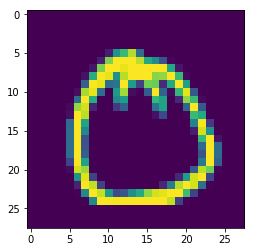

In [13]:
_image = _.reshape(28,28)
plt.imshow(_image)

In [14]:
y[1000]

0.0

# Locating the number 4 and plot the image


In [15]:
type(y)

numpy.ndarray

In [16]:
y == 4

array([False, False, False, ..., False, False, False], dtype=bool)

In [17]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [18]:
y[24754]

4.0

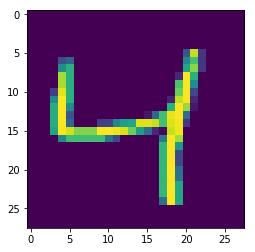

In [19]:
# Follow the same procedure to render 4
_ = X[24754]
_image = _.reshape(28,28)
plt.imshow(_image)

In [20]:
# Split the training set and the test sets
num_splits = 60000
X_train,X_test,y_train,y_test = X[:num_splits],X[num_splits:],y[:num_splits],y[num_splits:]


In [21]:
# Shuffling the dataset since it is not a time series data
import numpy as np
sh_i = np.random.permutation(num_splits)
X_train,y_train = X[sh_i],y[sh_i]

# Training the Binary Classifier

In [22]:
y_train_0 = (y_train == 0)

In [23]:
y_train_0

array([False, False, False, ..., False, False, False], dtype=bool)

In [24]:
y_test_0 = (y_test == 0)

In [25]:
y_test_0

array([ True,  True,  True, ..., False, False, False], dtype=bool)

Stochastic Gradient Descent Classifier

In [26]:
from sklearn.linear_model import SGDClassifier
# Create the classifier object
classifier = SGDClassifier()
# Fit the classifier onto the training set
classifier.fit(X_train,y_train_0)

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [27]:
classifier.predict(X[10000].reshape(1,-1))

array([False], dtype=bool)

# Performance Measures

## Measuring Accuracy Using the Cross-validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
classifier = SGDClassifier(random_state=0)


In [29]:
skfolds = StratifiedKFold(n_splits=3,random_state=100)

In [30]:
for tr_i,test_i in skfolds.split(X_train,y_train_0):
    clone_classifier = clone(classifier)
    X_train_fold = X_train[tr_i]
    y_train_folds = (y_train_0[tr_i])
    X_test_fold = X_train[test_i]
    y_test_fold = (y_train_0[test_i])
    
    clone_classifier.fit(X_train_fold,y_train_folds)
    y_pred = clone_classifier.predict(X_test_fold)
    # What are the number of correct precictions ?
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct/len(y_pred)))
    

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9883


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9878


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9828


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train,y_train_0,cv=3,scoring='accuracy')


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\l

array([ 0.98825059,  0.98775   ,  0.98284914])

# Confusion Matrix

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier,X_train,y_train_0,cv=3)

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\l

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_train_0,y_train_pred)

array([[53888,   189],
       [  634,  5289]], dtype=int64)

In [35]:
# Number of correct predictions = 58511
# Number of incorrect predictions = 1489

In [36]:
from sklearn.metrics import precision_score,recall_score


In [37]:
precision_score(y_train_0,y_train_pred)

0.96549835706462217

In [38]:
5768/(5768+1334)

0.8121655871585469

In [39]:
# Ratio of positive instances correctly identified by the classifier
recall_score(y_train_0,y_train_pred)

0.89295964882660817

In [40]:
5768/(5768+155)

0.9738308289718048

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_0,y_train_pred)

0.92781334970616614

In [42]:
classifier = SGDClassifier(random_state=0)
classifier.fit(X_train,y_train_0)

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [43]:
y[1000]

0.0

In [44]:
y_scores = classifier.decision_function(X[1000].reshape(1,-1))
y_scores

array([ 223764.42777499])

In [45]:
threshold = 0

In [46]:
y_some_digits_pred = (y_scores > threshold)

In [47]:
y_some_digits_pred

array([ True], dtype=bool)

In [48]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True], dtype=bool)

In [49]:
y_scores = cross_val_predict(classifier,X_train,y_train_0,cv=3,method="decision_function")

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\l

In [58]:
plt.figure(figsize=(12,8))



(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   1.40000000e+01,   1.50000000e+01,
          1.80000000e+01,   1.00000000e+01,   2.50000000e+01,
          3.60000000e+01,   2.90000000e+01,   3.00000000e+01,
          4.70000000e+01,   4.70000000e+01,   7.60000000e+01,
          8.70000000e+01,   1.02000000e+02,   1.04000000e+02,
          1.67000000e+02,   1.73000000e+02,   2.20000000e+02,
          2.45000000e+02,   2.78000000e+02,   3.33000000e+02,
          3.72000000e+02,   4.78000000e+02,   5.03000000e+02,
          5.78000000e+02,   6.91000000e+02,   8.48000000e+02,
          9.53000000e+02,   1.08300000e+03,   1.19600000e+03,
          1.25700000e+03,   1.48300000e+03,   1.58600000e+03,
          1.80000000e+03,   1.87600000e+03,   1.95300000e+03,
        

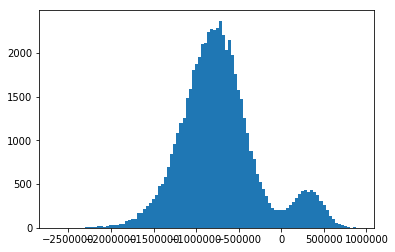

In [59]:
plt.hist(y_scores,bins=100)

# For every possible threshold compute the precision and recall

In [60]:
from sklearn.metrics import precision_recall_curve

In [61]:
precisions,recalls,thresholds = precision_recall_curve(y_train_0,y_scores)

In [67]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])

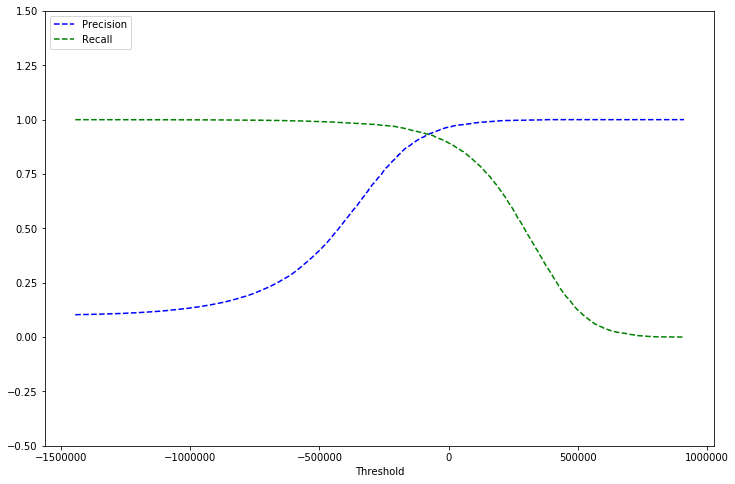

In [68]:
plt.figure(figsize=(12,8))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

Text(0.5,1,'PR Curve : Precisions/Recalls Tradeoff')

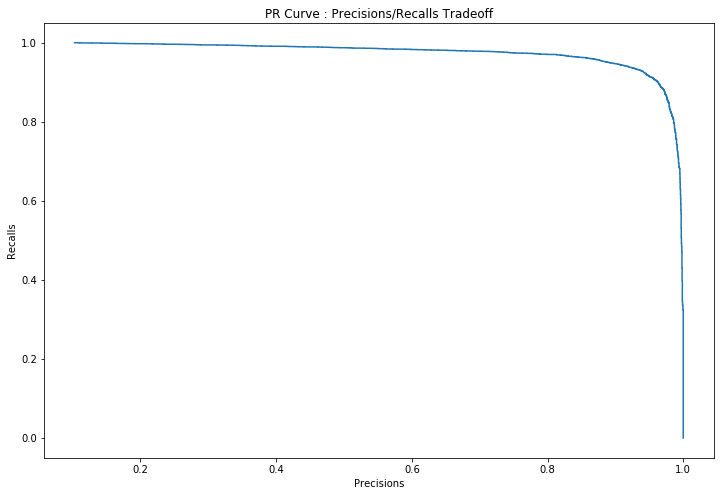

In [69]:
plt.figure(figsize=(12,8))
plt.plot(precisions,recalls)
plt.xlabel("Precisions")
plt.ylabel("Recalls")
plt.title("PR Curve : Precisions/Recalls Tradeoff")

# Setting higher precisions

In [70]:
len(precisions)

57545

In [71]:
len(thresholds)

57544

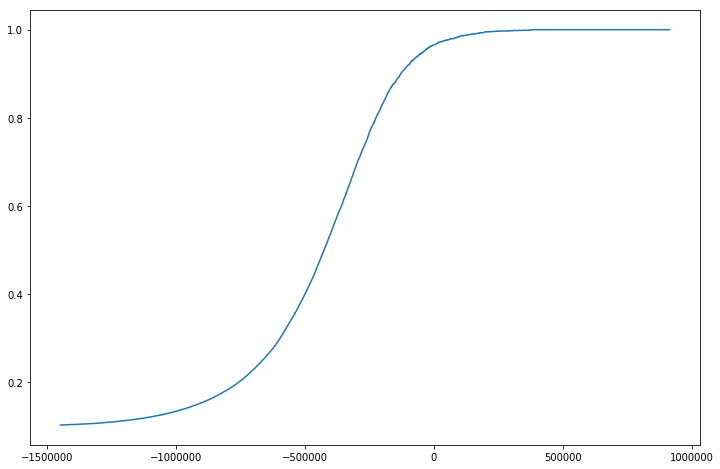

In [73]:
plt.figure(figsize=(12,8))
plt.plot(thresholds,precisions[1:])

In [77]:
idx = len(precisions[precisions < 0.9])
idx


51311

In [78]:
y_train_pred_90 = (y_scores > 21454)

In [79]:
precision_score(y_train_0,y_train_pred_90)

0.97201492537313428

In [80]:
recall_score(y_train_0,y_train_pred_90)

0.8796218132703022

# Setting High Precisions

In [81]:
# For 99% precisions
idx = len(precisions[precisions < .99])

In [82]:
thresholds[idx]

146534.51373103823

In [83]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [84]:
precision_score(y_train_0,y_train_pred_90)

0.99004204470015489

In [85]:
recall_score(y_train_0,y_train_pred_90)

0.75536045922674322

# Setting High Recall Score

In [86]:
idx = len(recalls[recalls>0.9])

In [87]:
thresholds[idx]

-10311.149694774786

In [88]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [89]:
precision_score(y_train_0,y_train_pred_90)

0.9627890173410405

In [90]:
recall_score(y_train_0,y_train_pred_90)

0.89988181664696942

# ROC Curve

In [92]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_0,y_scores)

In [93]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

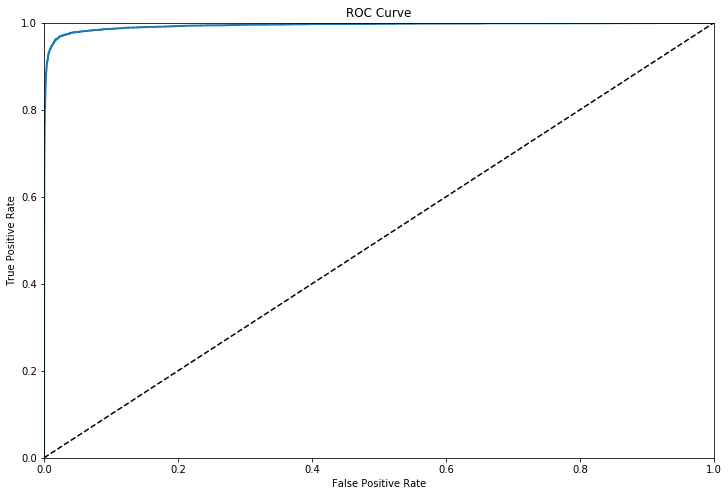

In [94]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr,tpr)
plt.show()

# Model Comparison 
# RANDOM FOREST

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
RFclassifier = RandomForestClassifier(random_state=0)

In [100]:
probab_forest = cross_val_predict(RFclassifier,X_train,y_train_0,cv=3,method="predict_proba")

In [102]:
y_scores_forest = probab_forest[:,1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_0,y_scores_forest)

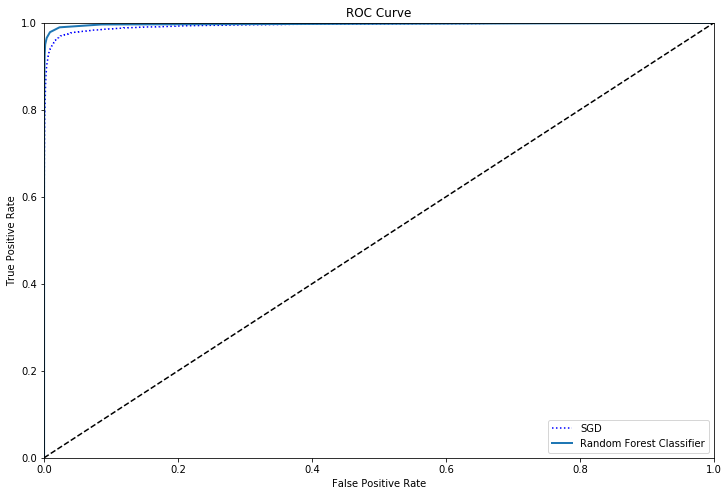

In [103]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_train_0,y_scores_forest)

0.9973042500777346

In [106]:
RFclassifier.fit(X_train,y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
y_train_RF = cross_val_predict(RFclassifier,X_train,y_train_0,cv=3)

In [109]:
precision_score(y_train_0,y_train_RF)

0.99116002164892658

In [ ]:
recall_score(y_train_0,y_train_RF)

In [110]:
confusion_matrix(y_train_0,y_train_RF)

array([[54028,    49],
       [  429,  5494]], dtype=int64)

# Number of correct predictions using RandomForestClassifier = 59522

# Number of incorrect predictions using RandomForestClassifier = 478